## REI602M Machine Learning - Homework 6
### Due: Monday 25.2.2019

**Objectives**: Boosting and stacking algorithms in supervised learning

**Name**: Emil Gauti Friðriksson, **email: ** egf3@hi.is, **collaborators:** (if any)

1\. [AdaBoost classifier, 50 points]

a) [40 points] Implement the AdaBoost algorithm described on page 339 in ESL using small decision trees as base classifiers. Redo the computations for the example of Figure 10.2. Plot the training error as well as test error, and discuss its behavior.

Use the following data set. The features $x_1^{(i)},\ldots,x_{10}^{(i)}$ are standard independent normally distributed variables and the output is defined as $y^{(i)}=1$ if $\sum_{j=1}^{10} (x^{(i)}_j)^2 > 9.34$ and zero otherwise (see comments below).

b) [10 points] Repeat the experiments from a) using a decision tree that captures 2-way feature interactions (3 leaf nodes). How do the results differ from a)?

*Comments*:

1) Use `sklearn.tree.DecisionTreeClassifier` to generate the decision trees. Tree stumps are obtained by setting `max_leaf_nodes=2`. The behaviour of your ensemble classifier may be somewhat different from the one shown in Figure 10.2 in ESL since the implementation of the base tree classifier is different. For this reason you can use e.g. 1000 boosting iterations instead of 400.

2) The `DecisionTreeClassifier.fit` function accepts a vector of sample weights as an optional argument.

3) The training data set in a) is obtained with the function `hw6` below with `hw6(n=1000)`. The test sets are obtained in the same way but using $n=10000$.

4) If $\text{err}_m$ becomes zero we are done.

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


def hw6(n=1000):
    # Toy dataset from page 339 in ESL
    #np.random.seed(1)
    X=np.random.randn(2*n,10)
    y=2*(np.sum(X**2,axis=1)>9.34)-1
    return X,y

def I_err(X,y,G):
    I = np.zeros(X.shape[0])
    y_pred = G.predict(X)
    for i in range(len(y)):
        if(y[i] != y_pred[i]):
            I[i] = 1
    return I

def AdaBoostM1(X_train,y_train,X_test,y_test,M):
    n=X_train.shape[0]
    n2=X_test.shape[0]
    w=np.ones(n)/n
    G_train = np.zeros((n,M))
    G_test = np.zeros((n2,M))
    GG_train = np.zeros(n)
    GG_test = np.zeros(n2)
    G=DecisionTreeClassifier(max_leaf_nodes=2)
    for m in range(M):
        
        G.fit(X_train,y_train,sample_weight=w)
        I = I_err(X_train,y_train,G)
        err= w*I
        error = sum(err)/sum(w)
        a = np.log((1-error)/error)
        w = w*np.exp(a*I)
        G_train[:,m] = a*G.predict(X_train)
        G_test[:,m] = a*G.predict(X_test)
    
    GG_train = np.sum(G_train,axis=1)   
    GG_test = np.sum(G_test,axis=1)
    return np.sign(GG_train), np.sign(GG_test)

X_train,y_train = hw6(n=1000)
X_test,y_test = hw6(n=10000)
n=X_train.shape[0]
p=X_train.shape[1]
n2=X_test.shape[0]
M=np.arange(1,700)
trainError=np.zeros(len(M))
testError=np.zeros(len(M))
print('{:<5s} {:<12s} {:<12s}'.format('M','Train Error','Test Error'))
print('-'*30)
for m in range(len(M)):
    G_train,G_test = AdaBoostM1(X_train,y_train,X_test,y_test,M[m])
    trainError[m] = np.abs(sum(G_train-y_train))/(2*n)
    testError[m] = np.abs(sum(G_test-y_test))/(2*n2)
    if m%100==0:
        print('{:<5d} {:<12f} {:<12f}'.format(M[m],trainError[m],testError[m]))




M     Train Error  Test Error  
------------------------------
1     0.438000     0.456000    
101   0.121500     0.137400    
201   0.027500     0.037150    
301   0.040500     0.041350    
401   0.027500     0.026200    
501   0.029500     0.032450    
601   0.024000     0.021000    


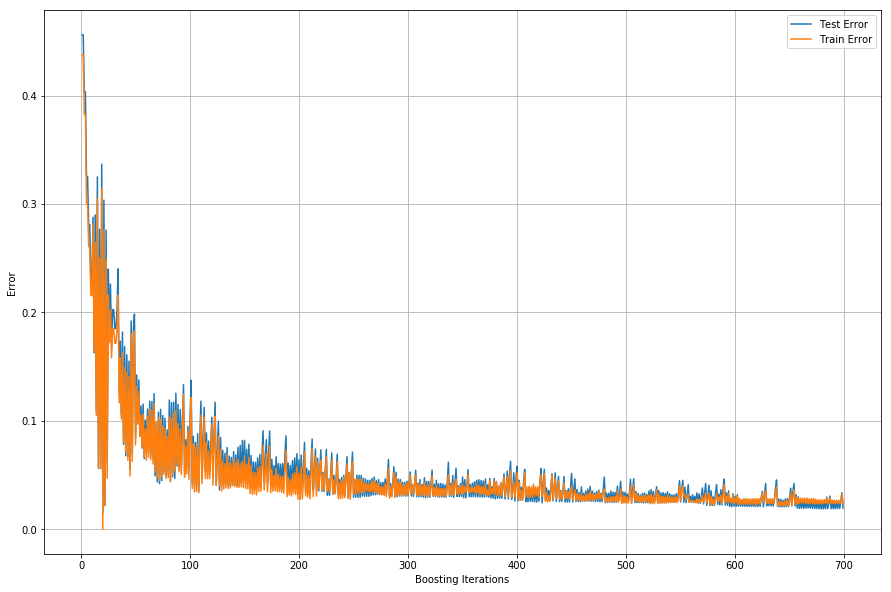

In [203]:
#Plottum myndina:
plt.figure(figsize=(15,10))
plt.plot(M,testError,label='Test Error')
plt.plot(M,trainError,label='Train Error')
plt.grid()
plt.xlabel('Boosting Iterations')
plt.ylabel('Error')
plt.legend()

Grafið sýnir að Test/Train - error byrjar í háu gildi $\approx 0.4$ sem er lítið betra heldur en að giska af handahófi en það fer hratt lækkandi og nálgast eitthvað gildi sem það svo sveiflast í kringum. Líkleg ástæða þess að villan sveiflast umhverfis eitthvað gildi er að **ég veit ekki alveg :/**

**(b) Liður**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


def hw6(n=1000):
    # Toy dataset from page 339 in ESL
    #np.random.seed(1)
    X=np.random.randn(2*n,10)
    y=2*(np.sum(X**2,axis=1)>9.34)-1
    return X,y

def I_err(X,y,G):
    I = np.zeros(X.shape[0])
    y_pred = G.predict(X)
    for i in range(len(y)):
        if(y[i] != y_pred[i]):
            I[i] = 1
    return I

def AdaBoostM1(X_train,y_train,X_test,y_test,M):
    n=X_train.shape[0]
    n2=X_test.shape[0]
    w=np.ones(n)/n
    G_train = np.zeros((n,M))
    G_test = np.zeros((n2,M))
    GG_train = np.zeros(n)
    GG_test = np.zeros(n2)
    G=DecisionTreeClassifier(max_leaf_nodes=3)#2->3
    for m in range(M):
        
        G.fit(X_train,y_train,sample_weight=w)
        I = I_err(X_train,y_train,G)
        err= w*I
        error = sum(err)/sum(w)
        a = np.log((1-error)/error)
        w = w*np.exp(a*I)
        G_train[:,m] = a*G.predict(X_train)
        G_test[:,m] = a*G.predict(X_test)
    
    GG_train = np.sum(G_train,axis=1)   
    GG_test = np.sum(G_test,axis=1)
    return np.sign(GG_train), np.sign(GG_test)

X_train,y_train = hw6(n=1000)
X_test,y_test = hw6(n=10000)
n=X_train.shape[0]
p=X_train.shape[1]
n2=X_test.shape[0]
M=np.arange(1,300)
trainError=np.zeros(len(M))
testError=np.zeros(len(M))
print('{:<5s} {:<12s} {:<12s}'.format('M','Train Error','Test Error'))
print('-'*30)
for m in range(len(M)):
    G_train,G_test = AdaBoostM1(X_train,y_train,X_test,y_test,M[m])
    trainError[m] = np.abs(sum(G_train-y_train))/(2*n)
    testError[m] = np.abs(sum(G_test-y_test))/(2*n2)
    if m%100==0:
        print('{:<5d} {:<12f} {:<12f}'.format(M[m],trainError[m],testError[m]))

Hér er aðal breytingin hversu hratt villan(error) fellur sem fall af Boosting iteration. Hún fellur töluvert hraðar þegar *max_leaf_note=3* í staðinn fyrir *max_leaf_note=2* eins og í **(a)** lið 

2\. [Stacked regression models, 50 points] In this problem you will construct a stacked two-stage regression model for a subset of the Million Song Database (MSD). The data set contains audio features for approximately 500K songs. Each song is represented by 90 features describing its "timbre" that are derived from the sampled recordings. The task is to predict the release year of a song.

A two-stage stacking model has several regression models in stage 1, all trained on the same data set. Predictions from stage 1 models form a new (derived) data set which is used as input to a single regression model in stage 2. This model "blends" predictions from the stage 1 models to create a final prediction, hopefully more accurate than the individual stage 1 predictions.

Your stacked regression model will employ Lasso, ExtraTrees, Random Forests and Gradient boosted trees in stage 1 and a linear regression model in stage 2. Training and testing are performed as follows:

*Training*: Train each model on the training set, using default parameters to begin with, but increase the number of trees for Extra Trees and Random Forests. Construct a training data set for the stage 2 model by sending the *validation* set (not the original training set) through each of the stage 1 models, resulting in an `n_val` by 4 matrix $X_2$. Train a linear regression model for stage 2 on $(X_2, y_\text{val})$.

*Testing*: Send the test data though all the models in stage 1 to obtain an `n_test` by 4 matrix. The stage 2 linear regression model is used to predict the data in this matrix to obtain the final predictions.

a) [32 points] Construct the stacked regression model described above, report its mean-squared error and $R^2$ coefficient on the test set. Report also the mean-squared error of the individual stage 1 models.

b) [8 points] Answer the following questions:

i) Are the individual models doing a good job on the prediction task? Why or why not?

ii) Is the stacking procedure worth the extra effort in your opinion? Why or why not?

iii) Are any of the regression models sensitive to scaling of input data?

iv) Why is it not a good idea to use the original training set to construct the $X_2$ data set for the stage 2 regression model?

c) [10 points] In the spirit of Kaggle, can you improve the results from a) by tuning hyperparameters in level 1, using a different regression model in stage 2 or more training data?

*Comments*:

1) Download the subset of the Million Song Databse from here (210 MB): http://archive.ics.uci.edu/ml/datasets/YearPredictionMSD# (mirror: https://notendur.hi.is/steinng/kennsla/2019/ml/data/YearPredictionMSD.zip)

2) Use the train, validation and test partitions of the data defined in `load_msd.py`

`import load_msd as lmsd
X_train, y_train, X_val, y_val, X_test, y_test = lmsd.get_data(ntrain=10000)`

3) For Extra Trees and Random Forests you can set `n_jobs=-1` to use multiple cores/processors for training and prediction.

In [201]:
# Your stacked regression model will employ Lasso, ExtraTrees, Random Forests 
# and Gradient boosted trees in stage 1 and a linear regression model in stage 2
import load_msd
X_train, y_train, X_val, y_val, X_test, y_test = load_msd.get_data()



[1998. 1989. 2002. ... 2007. 2009. 1967.]


In [ ]:
#Stage 1
